# GOOGLE Stocks - Price Prediction
## _if **COVID** did not happen :|_

### Import neccesary libraries

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
raw_df = pd.read_csv('D:\GitHub_Projects\stockprice_prediction\GOOG(2004-2020)_m.csv')
raw_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-09-01,51.158245,67.257904,49.285267,64.558022,64.558022,213505683
1,2004-10-01,65.155777,99.601669,64.209328,94.964050,94.964050,516062906
2,2004-11-01,96.413620,100.423592,80.353813,90.650223,90.650223,557269182
3,2004-12-01,90.635277,99.566795,83.920448,96.035034,96.035034,291774158
4,2005-01-01,98.331429,102.266678,87.815842,97.444756,97.444756,411867818


In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       198 non-null    object 
 1   Open       198 non-null    float64
 2   High       198 non-null    float64
 3   Low        198 non-null    float64
 4   Close      198 non-null    float64
 5   Adj Close  198 non-null    float64
 6   Volume     198 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 11.0+ KB


In [32]:
# convert Date column from 'object' dtype to 'datetime' dtype and set as index col
raw_df['Date'] = pd.to_datetime(raw_df['Date'])
raw_df['Year'] = raw_df.Date.dt.year

raw_df.set_index('Date', inplace=True)
raw_df.head()

,Open,High,Low,Close,Adj Close,Volume,Year
Date,,,,,,,
2004-09-01,51.158245,67.257904,49.285267,64.558022,64.558022,213505683,2004
2004-10-01,65.155777,99.601669,64.209328,94.964050,94.964050,516062906,2004
2004-11-01,96.413620,100.423592,80.353813,90.650223,90.650223,557269182,2004
2004-12-01,90.635277,99.566795,83.920448,96.035034,96.035034,291774158,2004
2005-01-01,98.331429,102.266678,87.815842,97.444756,97.444756,411867818,2005


In [36]:
# Scale data
scale = lambda x: x/x.max()
scaled_df = raw_df.iloc[:, 0:6].apply(scale, axis=0)
scaled_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-09-01,0.027600,0.031778,0.026627,0.031186,0.031186,0.273403
2004-10-01,0.035152,0.047060,0.034690,0.045875,0.045875,0.660840
2004-11-01,0.052015,0.047448,0.043413,0.043791,0.043791,0.713606
2004-12-01,0.048898,0.047043,0.045340,0.046392,0.046392,0.373629
2005-01-01,0.053050,0.048319,0.047444,0.047073,0.047073,0.527414


In [37]:
# Visualize mean data by year
yearly_mean = scaled_df.groupby(pd.Grouper(freq='Y')).mean()
yearly_mean

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-12-31,0.040916,0.043332,0.037517,0.041811,0.041811,0.505370
2005-12-31,0.072378,0.070901,0.069555,0.068936,0.068936,0.577048
2006-12-31,0.110060,0.104029,0.103559,0.099926,0.099926,0.456645
2007-12-31,0.142442,0.134497,0.136281,0.132051,0.132051,0.292456
2008-12-31,0.130472,0.120696,0.112122,0.109489,0.109489,0.342622
2009-12-31,0.113870,0.109236,0.110030,0.108267,0.108267,0.189440
2010-12-31,0.142591,0.133582,0.133833,0.126418,0.126418,0.171665
2011-12-31,0.152957,0.141935,0.143585,0.137917,0.137917,0.166176
2012-12-31,0.172912,0.159503,0.163949,0.155691,0.155691,0.139480


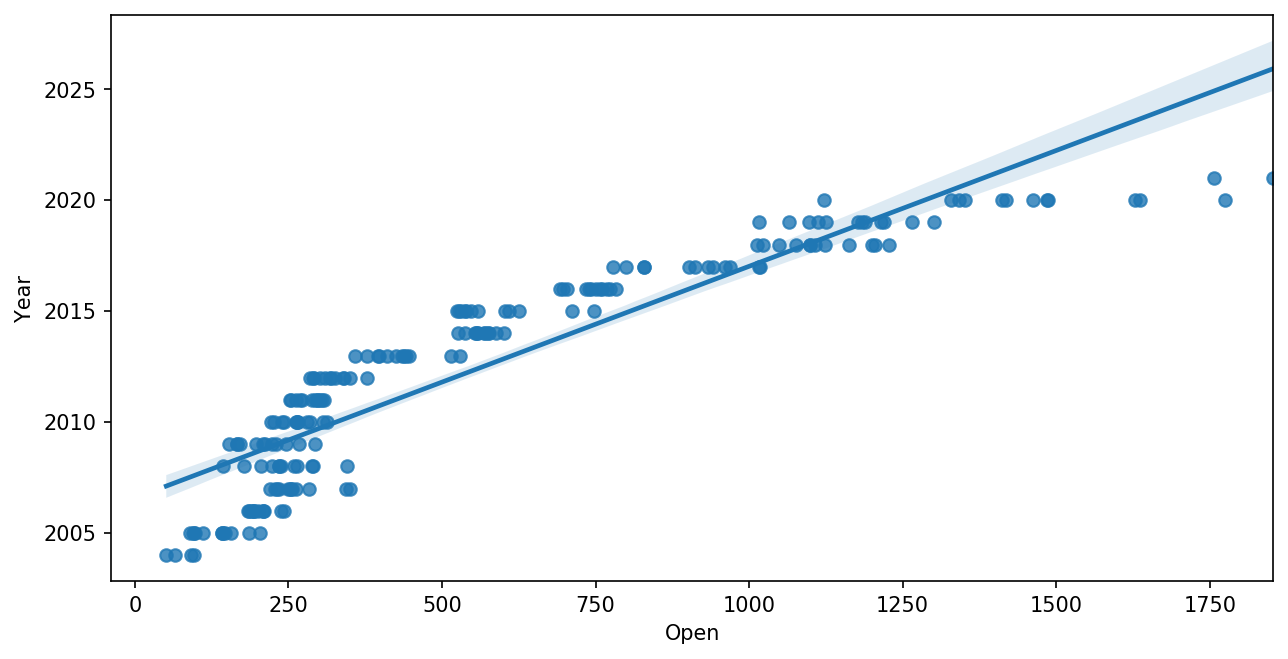

In [55]:
# Regression plot of Yearly Opening volume
plt.figure(figsize=(10, 5), dpi=150)
sns.regplot(x='Open', y='Year', data=raw_df, ci=95)

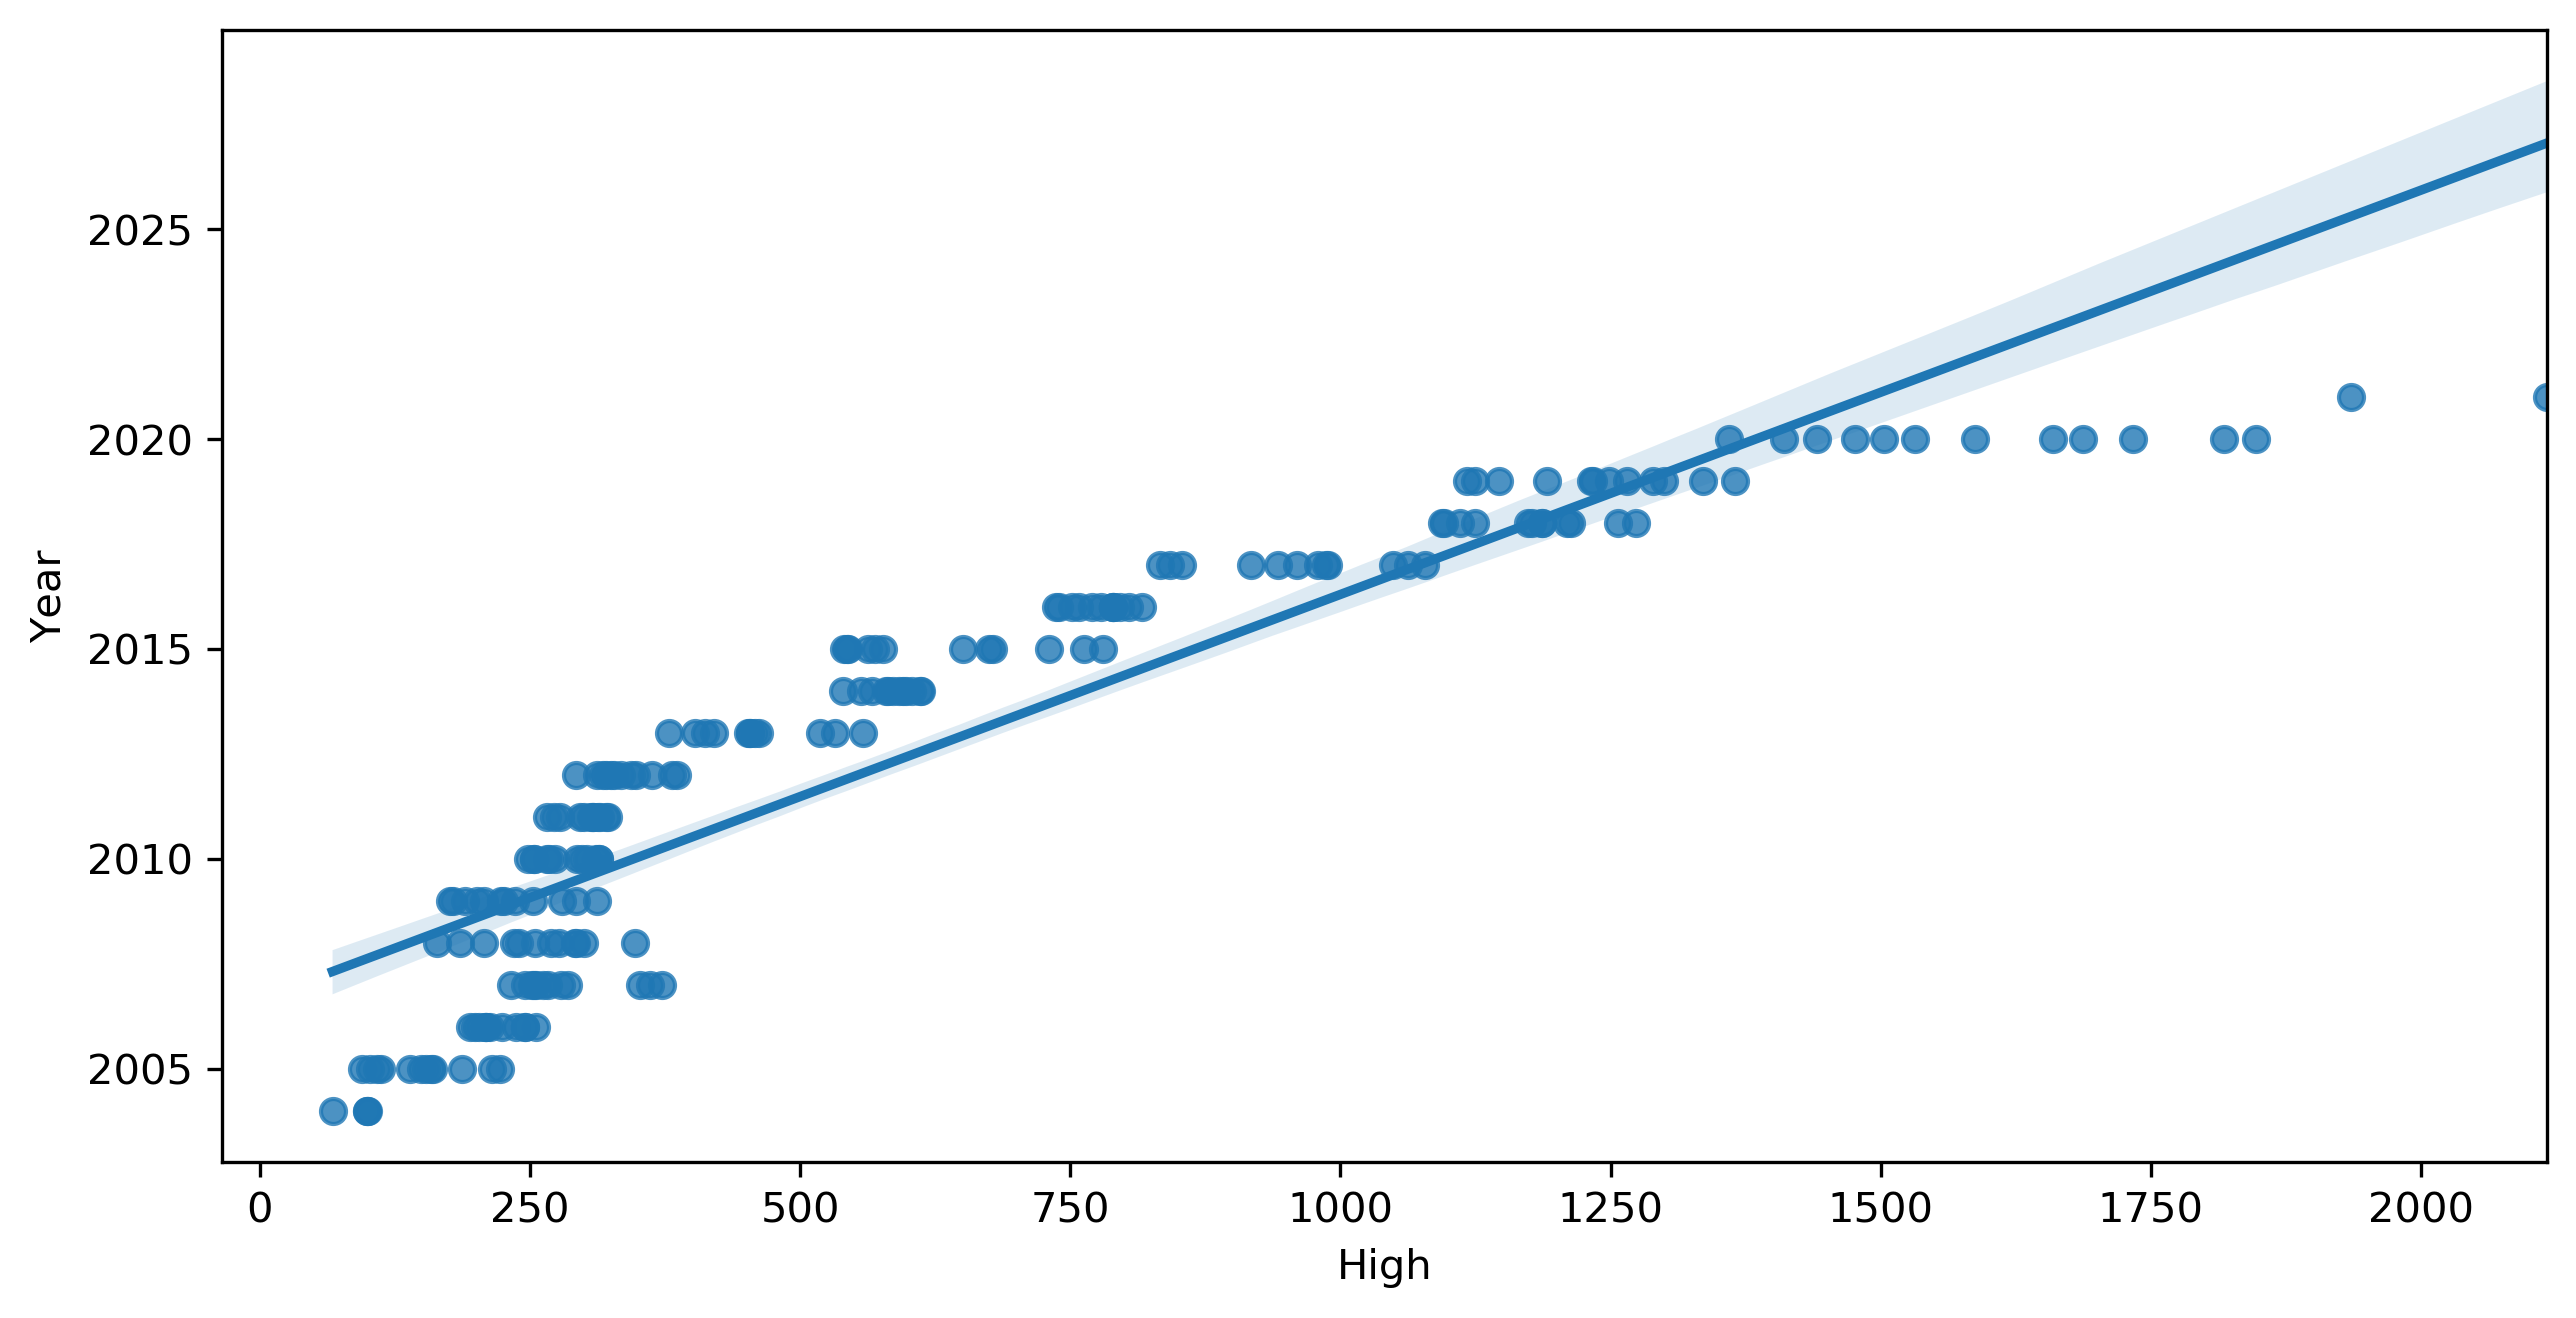

In [57]:
# Regression plot of Yearly High
plt.figure(figsize=(10, 5), dpi=150)
sns.regplot(x='High', y='Year', data=raw_df, ci=95)